In [13]:
import pandas as pd
compare_promts = pd.read_parquet('blip2_ft_sd/result/rl_other_generative_model_test.parquet')
contents=compare_promts['rl_generation']
refs=compare_promts['reference_prompt']
file_paths=compare_promts['img_path']

compare_promts

,generated_caption,reference_prompt,img_path,rl_generation
0,a beautiful fantasy digital painting of a Nors...,a beautiful Norse Warrior based on Hades with ...,./imgs/image_2700.png,"Greg Rutkowski and Raymond Swanland, a fantasy..."
1,"a blueprints of new york city, concept art, co...","blueprints for New York City, concept art, blu...",./imgs/image_4113.png,"a blueprints of new york city, concept art, by..."
2,"a spider with eyes of blood, concept art, high...","d d monster, huge spider monster covered in ey...",./imgs/image_3278.png,"a spider with eyes of blood, highly detailed, ..."
3,"concept art of medieval knight armor, 4 k, hig...","different views of medieval knights, beautiful...",./imgs/image_3909.png,"Concept art of medieval knight armor, 4 k, hig..."
4,lofi underwater bioshock steampunk portrait of...,"lofi underwater steampunk bioshock bikini, oct...",./imgs/image_2164.png,Portrait lofi underwater bioshock steampunk po...
...,...,...,...,...
295,"a beautiful painting of a medieval knight, by ...",a robot wearing medieval armor in the style of...,./imgs/image_4086.png,a painting of a medieval knight who looks like...
296,steampunk portrait of a man with a top hat and...,"Lofi Steampunk portrait, Pixar style, by Trist...",./imgs/image_3450.png,a steampunk portrait of a top sleazy man weari...
297,a beautiful painting of a dinosaur in a candyl...,"A dinosaur in a candy forest, digital art, tre...",./imgs/image_2398.png,a beautiful painting of a dinosaur in a candyl...
298,"a beautiful painting of a cute cat smiling, bl...",cute blue striped cat of cheshire from alice i...,./imgs/image_1770.png,A cute blue cat in the background smiling as a...


In [8]:
from tqdm import tqdm
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

scores = []

for i in tqdm(range(len(contents))):
    base_emd = model.encode(refs[i])
    each_emd = model.encode(contents[i])
    cosine_sim = util.pytorch_cos_sim(base_emd, each_emd)
    scores.append(cosine_sim.item())

100%|██████████| 300/300 [00:02<00:00, 129.06it/s]


In [9]:
import numpy as np

scores = np.array(scores)
k = 100

topk_indices = scores.argsort()[-k:][::-1]
topk_values = scores[topk_indices]

print("Top-k 索引:", topk_indices.tolist())
print("Top-k 值:", topk_values.tolist())

Top-k 索引: [152, 272, 7, 262, 88, 228, 17, 40, 253, 199, 1, 110, 70, 5, 229, 281, 231, 259, 148, 244, 113, 286, 3, 21, 248, 216, 252, 134, 208, 292, 92, 94, 36, 10, 64, 144, 165, 6, 219, 99, 266, 135, 61, 236, 230, 170, 46, 137, 49, 78, 283, 186, 284, 121, 173, 77, 198, 26, 273, 293, 151, 37, 56, 19, 197, 172, 13, 298, 83, 240, 297, 150, 164, 176, 140, 202, 161, 154, 25, 11, 160, 138, 9, 44, 105, 241, 30, 132, 254, 179, 147, 20, 48, 255, 279, 143, 124, 136, 119, 114]
Top-k 值: [0.9303048849105835, 0.8980851173400879, 0.8637402057647705, 0.8613077998161316, 0.8538196086883545, 0.8484976291656494, 0.8406738042831421, 0.8260224461555481, 0.8247061967849731, 0.819180428981781, 0.8124454021453857, 0.8070634603500366, 0.8056502342224121, 0.8038765788078308, 0.8028998374938965, 0.7996976375579834, 0.7996828556060791, 0.7971863746643066, 0.7929449081420898, 0.7897032499313354, 0.7837202548980713, 0.7807459235191345, 0.7769065499305725, 0.7756267786026001, 0.7711848020553589, 0.7683266401290894, 

In [15]:
for idx in topk_indices:
    print(refs[idx])
    print(contents[idx])
    print(file_paths[idx])

bonsai fruit tree with cherries. but minimalistic concept art by frank stella gilleard james whalen tom, colorful, soft light, trending on artstation, minimalism
a bonsai fruit tree with cherry blossoms.. but minimalistic concept art by frank stella gilleard james whalen tom, colorful, soft light, trending
./imgs/image_3884.png
a beautiful portrait of a water goddess with transparent skin by Greg Rutkowski and Raymond Swanland, Trending on Artstation, fishes background, ultra realistic digital art
A beautiful portrait of a water goddess with transparent skin by Greg Rutkowski and Raymond Swanland, Trending on Artstation, is by Raymond Swanland
./imgs/image_3757.png
lofi underwater bioshock steampunk portrait of scarlett johansson, octopus, Pixar style, by Tristan Eaton Stanley Artgerm and Tom Bagshaw.
Portrait lofi underwater bioshock, octopus, Pixar style, by Tristan Eaton Stanley
./imgs/image_2252.png
lofi biopunk portrait of harley quinn, Pixar style, by Tristan Eaton Stanley Artger

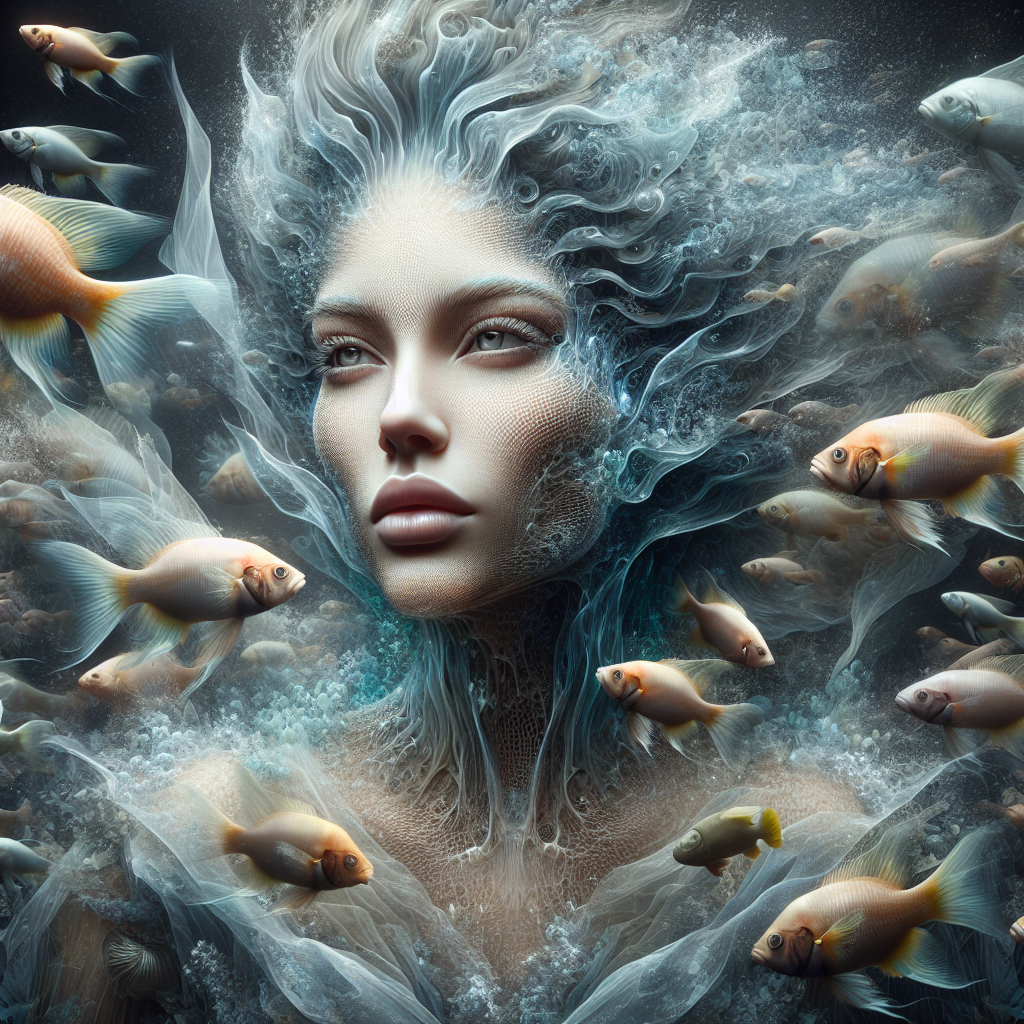

In [17]:
from PIL import Image
orig_image = Image.open(file_paths[272]).convert('RGB')
orig_image